In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from scipy.stats import skew

In [3]:
path = kagglehub.dataset_download("itsmesunil/bank-loan-modelling")
xls = pd.ExcelFile('/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx')
df = pd.read_excel(xls, sheet_name='Data')

In [9]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,0.053606,1,0.0,0,1,0,0,0
1,45,19,34,3,0.000000,1,0.0,0,1,0,0,0
2,39,15,11,1,-0.315711,1,0.0,0,0,0,0,0
3,35,9,100,1,0.511821,2,0.0,0,0,0,0,0
4,35,8,45,4,-0.315711,2,0.0,0,0,0,0,1


In [10]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,-0.032610,1.881000,0.313933,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,0.722105,0.839869,0.471186,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,-1.423026,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,-0.557564,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,0.442436,3.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,1.686478,3.000000,1.066128,1.000000,1.000000,1.00000,1.000000,1.000000


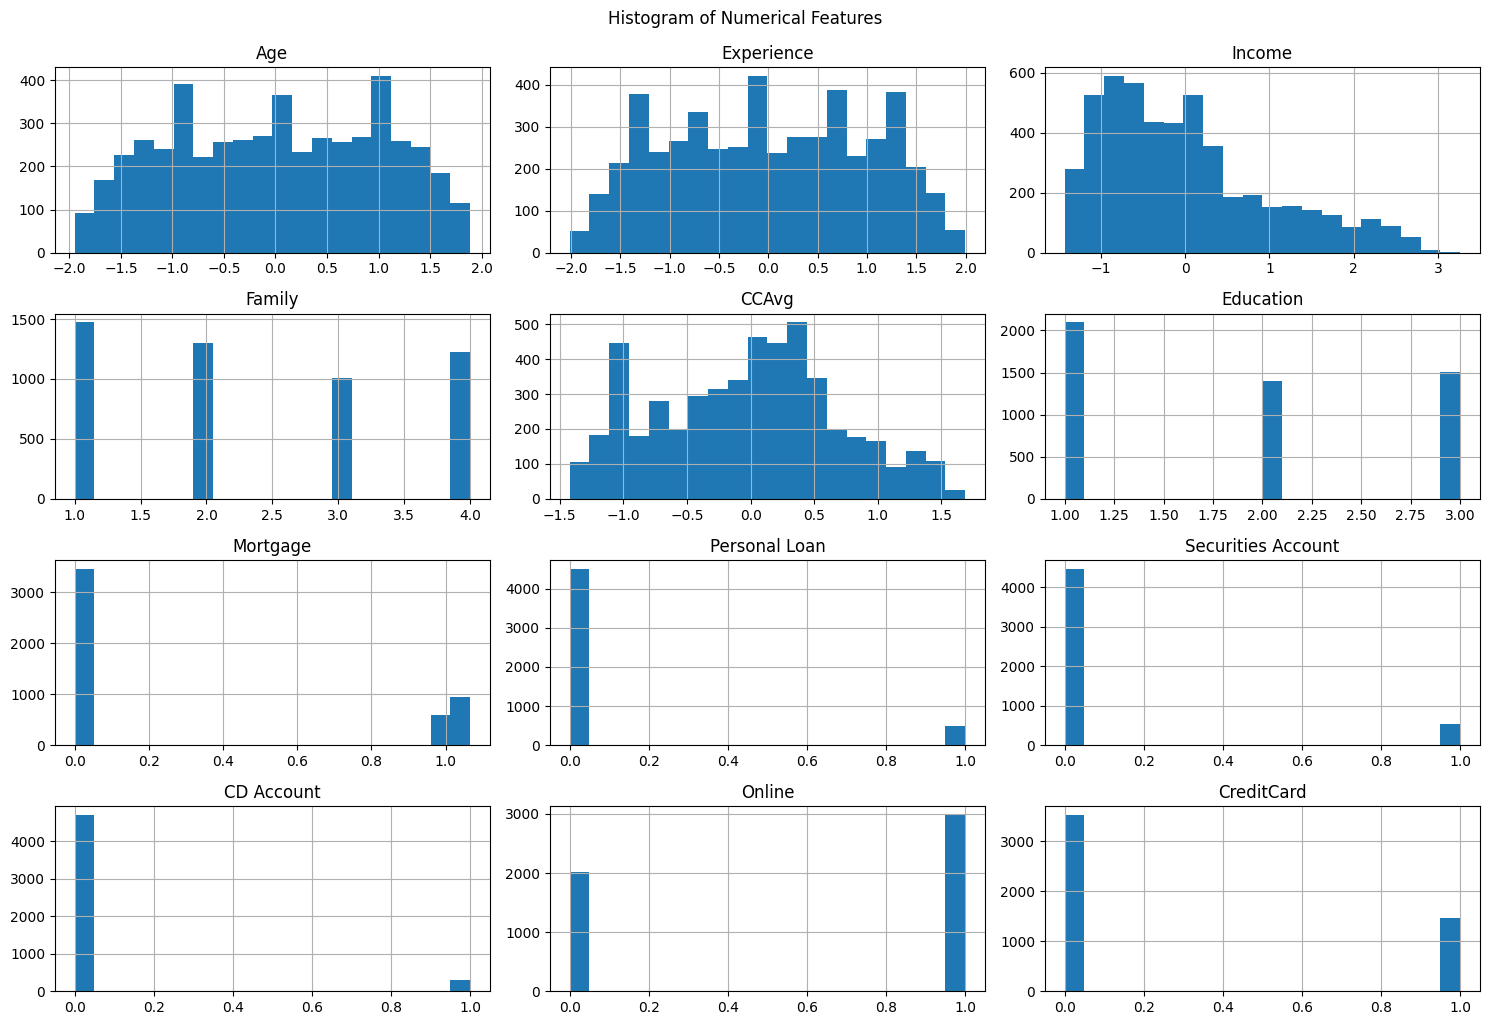

In [31]:

df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.suptitle("Histogram of Numerical Features", y=1.02)
plt.show()

In [32]:
categorical_cols = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


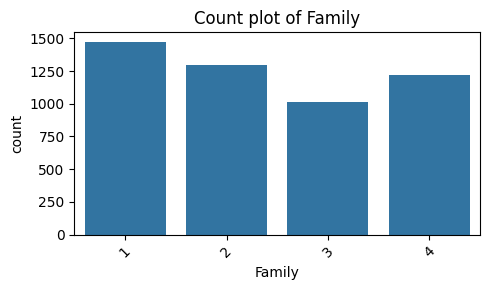

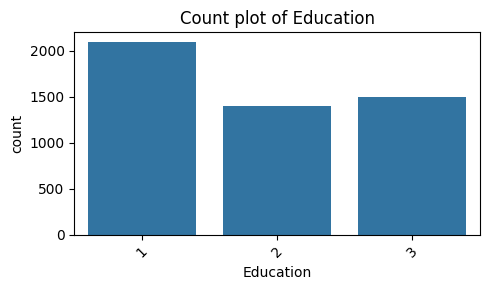

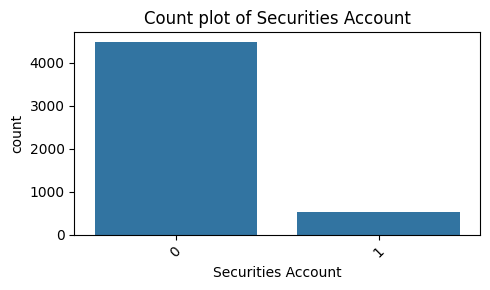

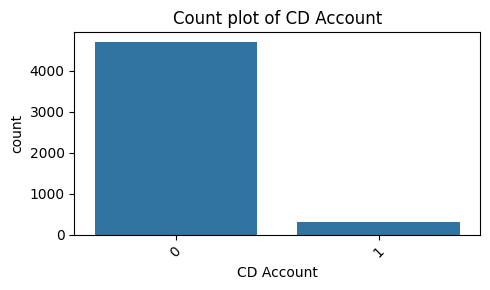

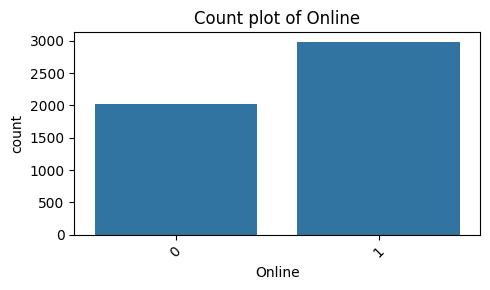

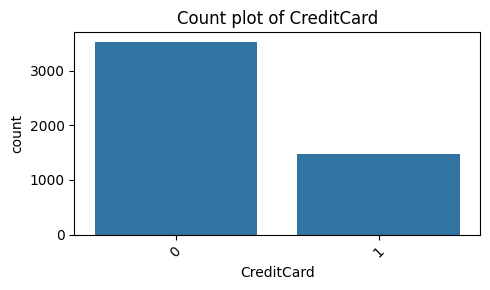

In [33]:
for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


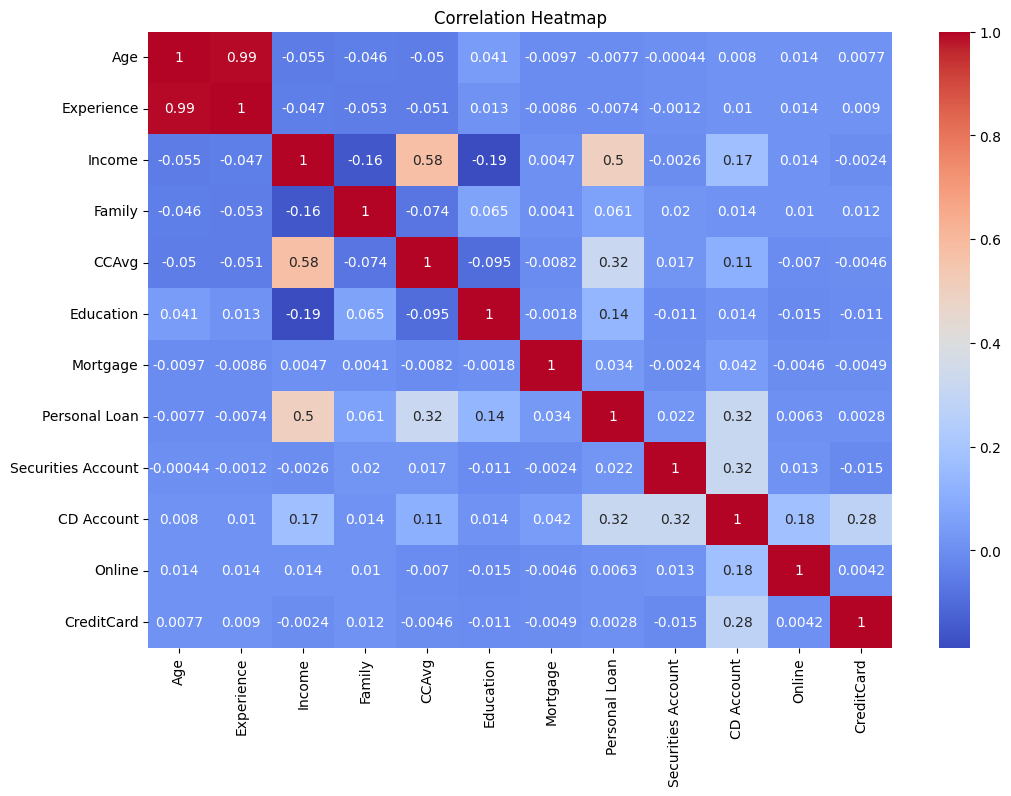

In [34]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

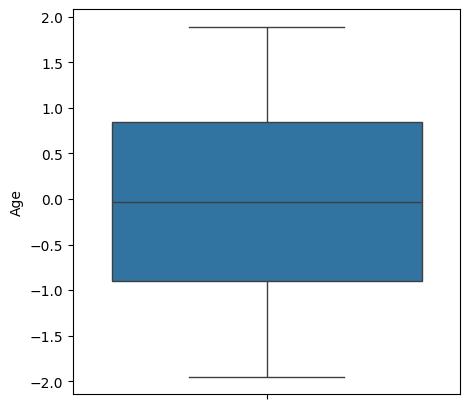

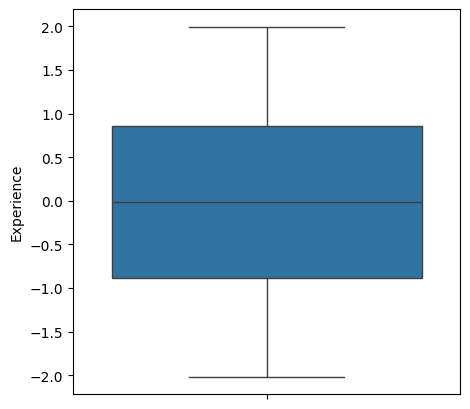

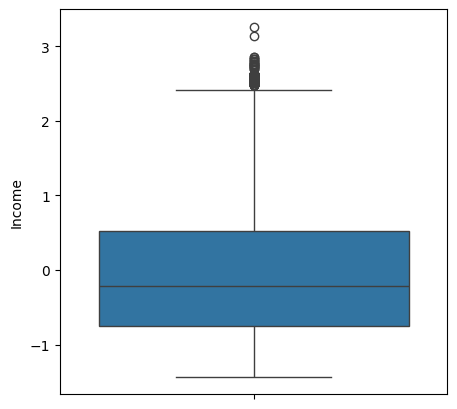

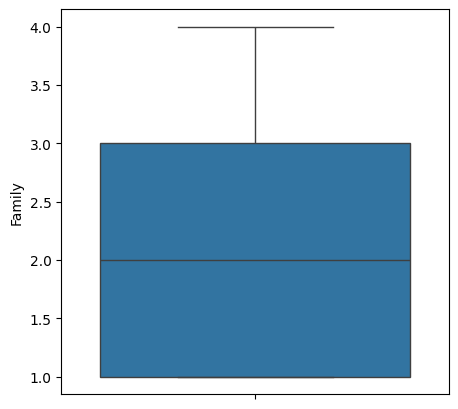

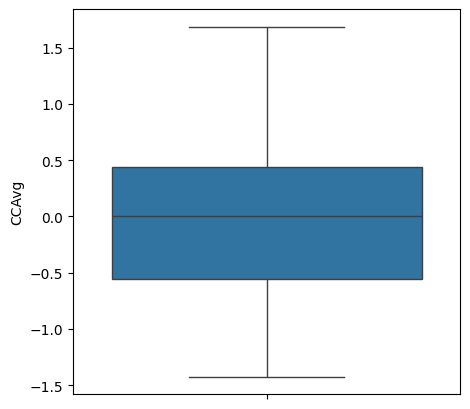

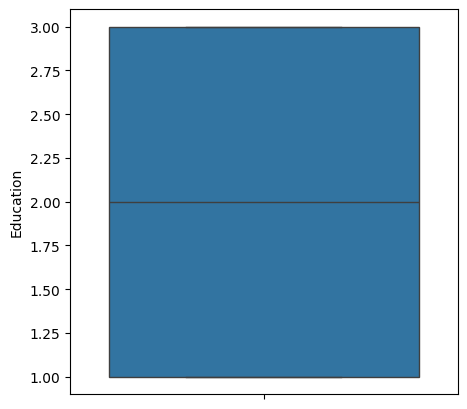

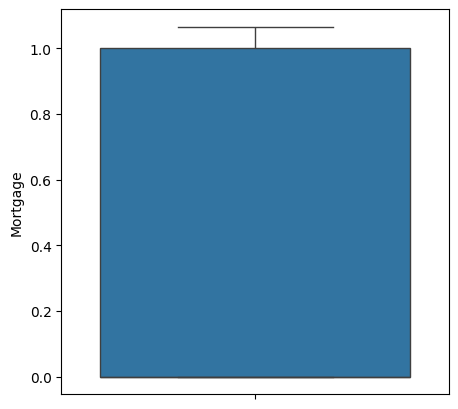

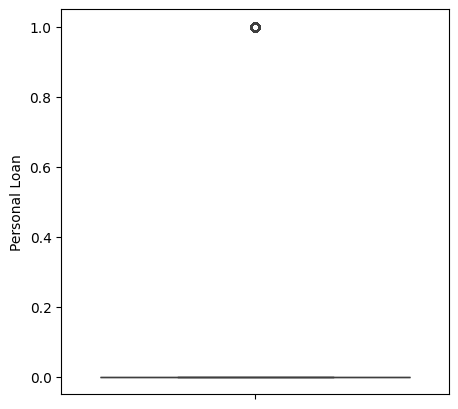

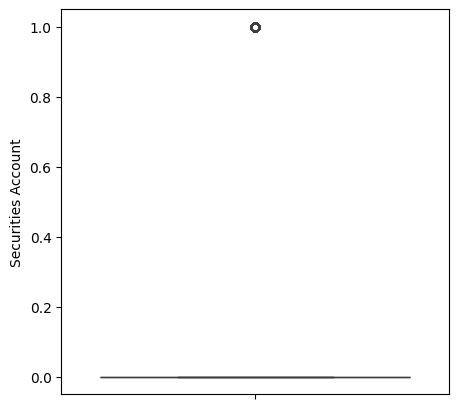

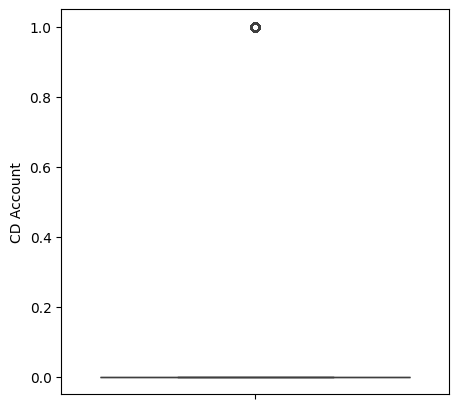

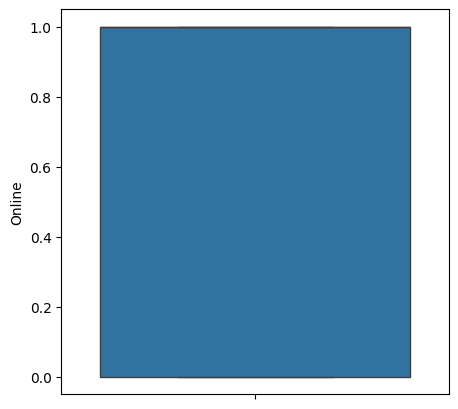

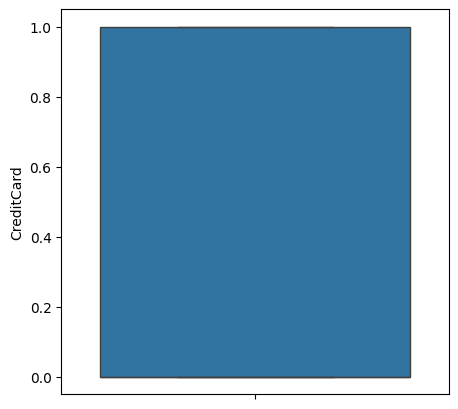

In [35]:
import seaborn as sns
for i in df.columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(df[i])
  plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define the new models
other_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42)
}

print("=== Validation Metrics for Additional Models ===")
for name, model in other_models.items():
    model.fit(X_train_bal, y_train_bal)
    preds = model.predict(X_val_sel)
    print(f"\n[{name}]")
    print("Accuracy :", accuracy_score(y_val, preds))
    print("Precision:", precision_score(y_val, preds))
    print("Recall   :", recall_score(y_val, preds))
    print("F1 Score :", f1_score(y_val, preds))


=== Validation Metrics for Additional Models ===

[Random Forest]
Accuracy : 0.9814285714285714
Precision: 0.9821428571428571
Recall   : 0.8208955223880597
F1 Score : 0.8943089430894309

[Gradient Boosting]
Accuracy : 0.9814285714285714
Precision: 0.9354838709677419
Recall   : 0.8656716417910447
F1 Score : 0.8992248062015504

[KNN]
Accuracy : 0.9685714285714285
Precision: 0.835820895522388
Recall   : 0.835820895522388
F1 Score : 0.835820895522388

[SVM]
Accuracy : 0.9771428571428571
Precision: 0.8695652173913043
Recall   : 0.8955223880597015
F1 Score : 0.8823529411764706


In [39]:
import kagglehub
import pandas as pd
import numpy as np
from scipy.stats import skew

from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE


def load_data(dataset_name: str, file_path: str, sheet_name: str = 'Data') -> pd.DataFrame:
    """Download and load the dataset from KaggleHub."""
    path = kagglehub.dataset_download(dataset_name)
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df.drop(['ID', 'ZIP Code'], axis=1)


def split_data(df: pd.DataFrame, target: str, test_size: float = 0.3, val_size: float = 0.2, random_state: int = 42):
    """Split the data into train, validation, and test sets."""
    X = df.drop(columns=[target])
    y = df[target]
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size, stratify=y_temp, random_state=random_state
    )
    return X_train, X_val, X_test, y_train, y_val, y_test


def preprocess(X_train, X_val, X_test):
    """Apply Yeo-Johnson + RobustScaler to CCAvg and Mortgage; StandardScaler to other continuous features."""
    rb_cols = ['CCAvg', 'Mortgage']
    std_cols = ['Income', 'Experience', 'Age']

    pt = PowerTransformer(method='yeo-johnson')
    rs = RobustScaler()
    ss = StandardScaler()

    # Fit on train
    X_train[rb_cols] = pt.fit_transform(X_train[rb_cols])
    X_train[rb_cols] = rs.fit_transform(X_train[rb_cols])
    X_train[std_cols] = ss.fit_transform(X_train[std_cols])

    # Transform val/test
    for X in (X_val, X_test):
        X[rb_cols] = pt.transform(X[rb_cols])
        X[rb_cols] = rs.transform(X[rb_cols])
        X[std_cols] = ss.transform(X[std_cols])

    return X_train, X_val, X_test


def feature_selection(X_train, y_train, X_val, X_test, n_features: int = 8):
    """Select top features via RFE using LogisticRegression."""
    selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=n_features)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_val_sel = selector.transform(X_val)
    X_test_sel = selector.transform(X_test)
    return X_train_sel, X_val_sel, X_test_sel


def balance_data(X_train, y_train, random_state: int = 42):
    """Balance the training data using SMOTE."""
    smote = SMOTE(random_state=random_state)
    X_bal, y_bal = smote.fit_resample(X_train, y_train)
    return X_bal, y_bal


def grid_search_models(X_train, y_train):
    """Perform GridSearchCV for specified classifiers."""
    grids = {
        'LogisticRegression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1','l2'], 'solver':['liblinear']}
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(),
            'params': {'max_depth':[3,5,7,None], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]}
        },
        'RandomForest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {'n_estimators':[50,100], 'max_depth':[5,10,None]}
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {'n_estimators':[50,100], 'learning_rate':[0.01,0.1]}
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {'n_neighbors':[3,5,7]}
        },
        'SVM': {
            'model': SVC(probability=True, random_state=42),
            'params': {'C':[0.1,1,10], 'kernel':['linear','rbf']}
        }
    }
    best_models = {}
    for name, cfg in grids.items():
        gs = GridSearchCV(cfg['model'], cfg['params'], scoring='f1', cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)
        best_models[name] = gs.best_estimator_
        print(f"Best {name} params: {gs.best_params_}")
    return best_models


def evaluate_model(model, X, y, label: str):
    """Compute and print evaluation metrics."""
    preds = model.predict(X)
    print(f"\n=== {label} ===")
    print("Accuracy :", accuracy_score(y, preds))
    print("Precision:", precision_score(y, preds))
    print("Recall   :", recall_score(y, preds))
    print("F1 Score :", f1_score(y, preds))


def main():
    df = load_data("itsmesunil/bank-loan-modelling", "/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx")
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, 'Personal Loan')
    X_train, X_val, X_test = preprocess(X_train, X_val, X_test)
    X_train_sel, X_val_sel, X_test_sel = feature_selection(X_train, y_train, X_val, X_test)
    X_train_bal, y_train_bal = balance_data(X_train_sel, y_train)

    # Hyperparameter tuning for all models
    best_models = grid_search_models(X_train_bal, y_train_bal)

    # Evaluate each on Validation
    print("\n--- Validation Metrics ---")
    for name, model in best_models.items():
        evaluate_model(model, X_val_sel, y_val, f"{name} (Val)")

    # Evaluate on Test
    print("\n--- Test Metrics ---")
    for name, model in best_models.items():
        evaluate_model(model, X_test_sel, y_test, f"{name} (Test)")


if __name__ == "__main__":
    main()


Best LogisticRegression params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best DecisionTree params: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best RandomForest params: {'max_depth': None, 'n_estimators': 100}
Best GradientBoosting params: {'learning_rate': 0.1, 'n_estimators': 100}
Best KNN params: {'n_neighbors': 3}
Best SVM params: {'C': 10, 'kernel': 'rbf'}

--- Validation Metrics ---

=== LogisticRegression (Val) ===
Accuracy : 0.8842857142857142
Precision: 0.4461538461538462
Recall   : 0.8656716417910447
F1 Score : 0.5888324873096447

=== DecisionTree (Val) ===
Accuracy : 0.9642857142857143
Precision: 0.8088235294117647
Recall   : 0.8208955223880597
F1 Score : 0.8148148148148148

=== RandomForest (Val) ===
Accuracy : 0.9828571428571429
Precision: 0.9824561403508771
Recall   : 0.835820895522388
F1 Score : 0.9032258064516129

=== GradientBoosting (Val) ===
Accuracy : 0.98
Precision: 0.9344262295081968
Recall   : 0.8507462686567164
F1 Score : 0.890625

